In [1]:
# primary settings
state = 'AL'
district_type = 'CD'
level = 'vtd'
minority = 'Black'

In [2]:
filepath = 'C:\\districting-data-2020\\'
filename = state + '_' + level + '.json'

from read import read_graph_from_json
G = read_graph_from_json( filepath + filename )

In [3]:
from census_codes import get_census_codes
codes = get_census_codes(minority)

for i in G.nodes:
    G.nodes[i]['VAP'] = G.nodes[i]['P0030001']
    G.nodes[i]['BVAP'] = sum( G.nodes[i][code] for code in codes )
    G.nodes[i]['BVAP_PERCENTAGE'] = G.nodes[i]['BVAP'] / G.nodes[i]['VAP']

In [4]:
import geopandas as gpd
filename = state + '_' + level + '.shp'
df = gpd.read_file( filepath + filename )

bvap_percentage = [ -1 for i in G.nodes ]
node_with_this_geoid = { G.nodes[i]['GEOID20'] : i for i in G.nodes }

for u in range(G.number_of_nodes()):
    geoid = df['GEOID20'][u]
    i = node_with_this_geoid[geoid]
    bvap_percentage[u] = G.nodes[i]['BVAP_PERCENTAGE']

df['bvap_percentage'] = bvap_percentage

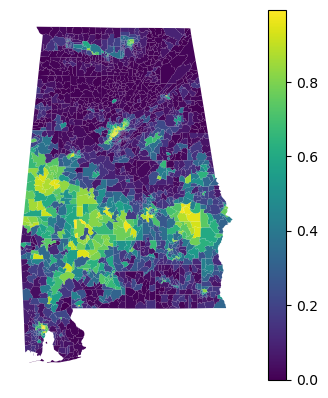

In [5]:
fig = df.plot(column='bvap_percentage', legend=True)
fig.set_axis_off();

In [6]:
# https://en.wikipedia.org/wiki/Black_Belt_(region_of_Alabama)
black_belt_names = ['Barbour',
'Bullock',
'Butler',
'Choctaw',
'Crenshaw',
'Dallas',
'Greene',
'Hale',
'Lowndes',
'Macon',
'Marengo',
'Montgomery',
'Perry',
'Pickens',
'Pike',
'Russell',
'Sumter',
'Wilcox']

In [7]:
level = 'county'
filename = state + '_' + level + '.json'
G = read_graph_from_json( filepath + filename )

In [8]:
filename = state + '_' + level + '.shp'
df = gpd.read_file( filepath + filename )
isbb = [ -1 for i in G.nodes ]
node_with_this_geoid = { G.nodes[i]['GEOID20'] : i for i in G.nodes }

for u in range(G.number_of_nodes()):
    geoid = df['GEOID20'][u]
    i = node_with_this_geoid[geoid]
    isbb[u] = 1 if G.nodes[i]['NAME20'] in black_belt_names else 0

df['isbb'] = isbb

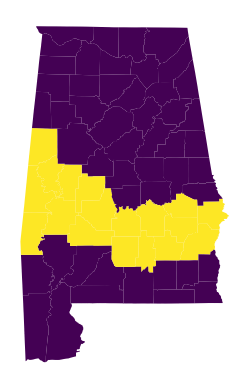

In [9]:
fig = df.plot(column='isbb')
fig.set_axis_off();